Source: https://www.kaggle.com/code/kanberburak/rfm-analysis/notebook

In [62]:
# libraries
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [35]:
# import dataset
df = pd.read_csv('online_retail.csv')

# Visualize dataset

In [36]:
df.shape

(1067371, 8)

In [37]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [39]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [40]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

# Dataset clean

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [43]:
# identify the orders cancelled
df[df["Invoice"].str.contains("C", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [44]:
# obtain the dataset without orders cancelled
df = df[~df["Invoice"].str.contains("C", na=False)]
df.shape

(805620, 8)

# Data Calculate

In [45]:
# total price for each product
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [46]:
# obtain the most recent date
df['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [47]:
# create a today date based on the most recent date
today_date = dt.datetime(2011,12,11)

In [48]:
# Convert InvoiceDate from string (object) to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [49]:
# Aggregate data by each costumer and create the RFM metrics
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                     'Invoice':lambda y: y.nunique(),
                                     'TotalPrice': lambda z: z.sum()})
rfm.reset_index(inplace=True)
rfm['Customer ID'] = rfm['Customer ID'].astype(np.int64)
rfm.head(3)

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346,326,12,77556.46
1,12347,3,8,5633.32
2,12348,76,5,2019.40


In [50]:
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,326,12,77556.46
1,12347,3,8,5633.32
2,12348,76,5,2019.40


In [51]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5881.00,5881.00,5881.00,5881.00
mean,15314.67,201.99,6.29,3017.08
std,1715.43,209.49,13.01,14734.13
min,12346.00,1.00,1.00,0.00
25%,13833.00,26.00,1.00,347.80
50%,15313.00,96.00,3.00,897.62
75%,16797.00,380.00,7.00,2304.18
max,18287.00,739.00,398.00,608821.65


In [52]:
# filter Moneraty >0
rfm = rfm[rfm['Monetary']>0]

In [53]:
rfm['RecencyScore'] =  pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]) 
# Quanto mais recente, melhor. Então precisa classificar com a maior nota os menores Recency
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
# Quanto maior a frequência, melhor. Então precisa classificar com a maior nota os menores valores
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])
rfm.head(3)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346,326,12,77556.46,2,5,5
1,12347,3,8,5633.32,5,4,5
2,12348,76,5,2019.40,3,4,4


In [54]:
# Quantile-based logic
pd.qcut(rfm['Monetary'],5).unique().sort_values()

[(2.9490000000000003, 291.278], (291.278, 618.234], (618.234, 1248.538], (1248.538, 2966.686], (2966.686, 608821.65]]
Categories (5, interval[float64, right]): [(2.9490000000000003, 291.278] < (291.278, 618.234] < (618.234, 1248.538] < (1248.538, 2966.686] < (2966.686, 608821.65]]

In [55]:
rfm['rfmScore'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfmScore
0,12346,326,12,77556.46,2,5,5,255
1,12347,3,8,5633.32,5,4,5,545
2,12348,76,5,2019.40,3,4,4,344
3,12349,19,4,4428.69,5,3,5,535
4,12350,311,1,334.40,2,1,2,212
...,...,...,...,...,...,...,...,...
5876,18283,4,22,2736.65,5,5,4,554
5877,18284,432,1,461.68,1,2,2,122
5878,18285,661,1,427.00,1,2,2,122
5879,18286,477,2,1296.43,1,3,4,134


In [56]:
# Customer segmentation by Recency and Frequency
seg_map = {
     r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'   
}

In [59]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map,regex=True)
rfm

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfmScore,Segment
0,12346,326,12,77556.46,2,5,5,255,Can't Loose
1,12347,3,8,5633.32,5,4,5,545,Champions
2,12348,76,5,2019.40,3,4,4,344,Loyal Customers
3,12349,19,4,4428.69,5,3,5,535,Potential Loyalists
4,12350,311,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...,...
5876,18283,4,22,2736.65,5,5,4,554,Champions
5877,18284,432,1,461.68,1,2,2,122,Hibernating
5878,18285,661,1,427.00,1,2,2,122,Hibernating
5879,18286,477,2,1296.43,1,3,4,134,At Risk


In [61]:
rfm.groupby(by=['Segment']).agg({'Monetary':'mean','CustomerID':'count'}).reset_index().sort_values(by='Monetary',ascending=False)

,Segment,Monetary,CustomerID
3,Champions,10795.52,852
2,Can't Loose,8355.68,71
5,Loyal Customers,4199.73,1147
1,At Risk,1383.60,750
6,Need Attention,1283.11,269
8,Potential Loyalists,1155.43,713
0,About to Sleep,531.97,388
4,Hibernating,437.96,1522
7,New Customers,356.26,56
9,Promising,324.50,110


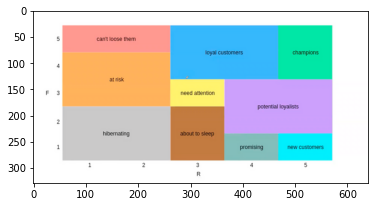

In [63]:
img = mpimg.imread('RFM.png')
imgplot = plt.imshow(img)
plt.show()